In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

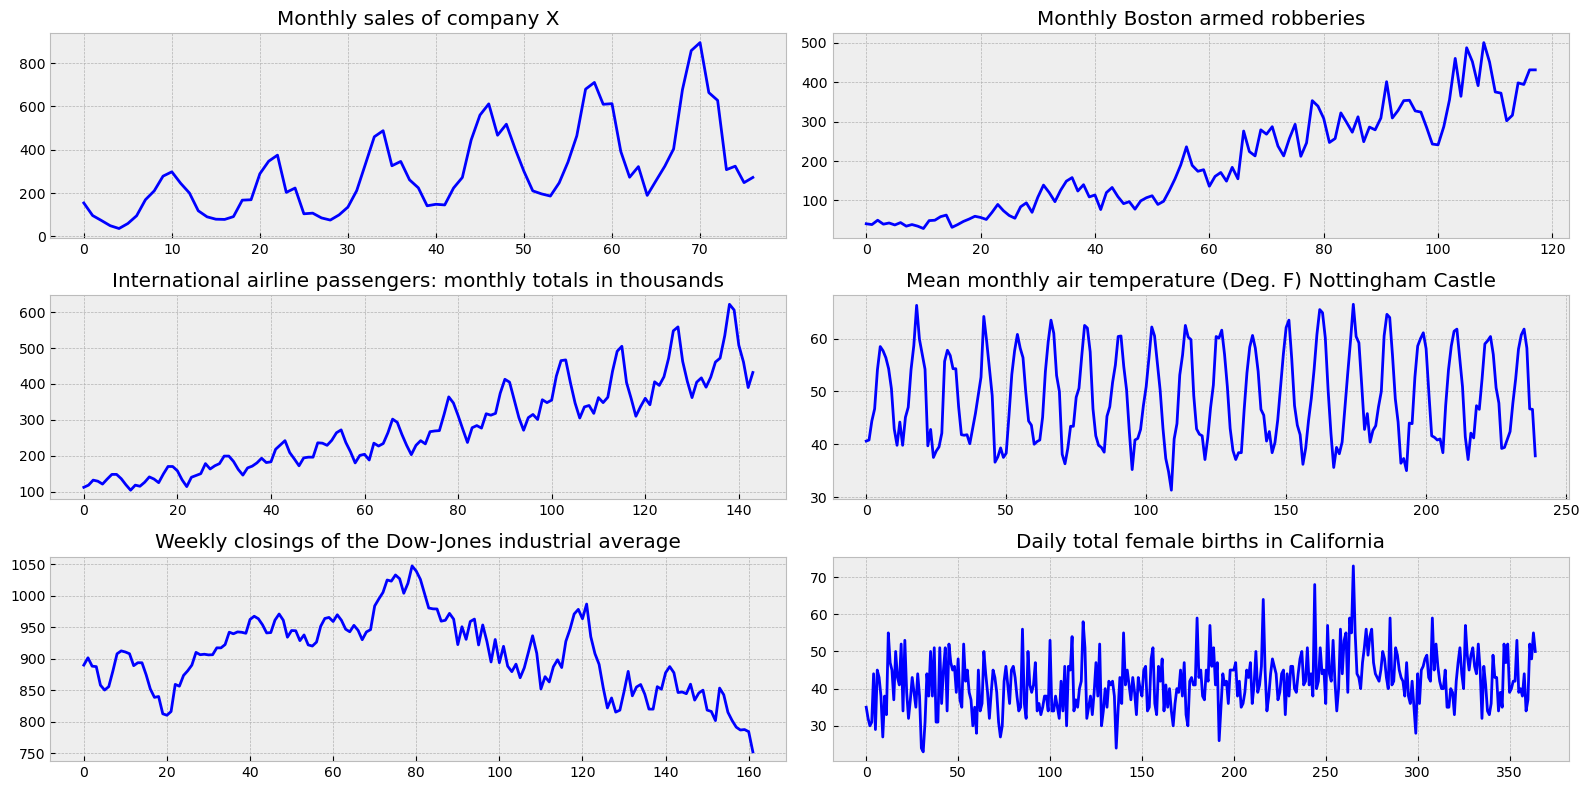

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [6]:
series = all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"]

In [7]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


In [8]:
from pmdarima.arima import auto_arima

# Подбор оптимальных параметров ARIMA
model = auto_arima(series, 
                   trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True, 
                   information_criterion='aic')

# Вывод оптимальных параметров
print(model.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1163.456, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1715.240, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1459.276, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1525.960, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2558.757, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1376.987, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1230.138, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1231.835, Time=0.30 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1144.219, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1355.313, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1159.383, Time=0.37 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=1350.317, Time=0.24 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=1183.392, Time=0.42 sec
 ARIMA(2,0,3)(0,0,0)[0]             : 